# Import required libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

# Helper Functions

In [5]:
def train_model_and_evaluate(df):
  # Store the salary column as the target vector (Y), and the remaning columns as the sample vector (X)
  X = np.array(df.loc[:, df.columns != 'Salary'])
  y = np.array(df['Salary'])

  # Use a 80% train set, 10% validation set, and 10% test dataset split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  X_test, X_cv, y_test, y_cv = train_test_split(X_train, y_train, test_size=0.5)

  # Run a linear regression on the data using the scikit-learn library
  reg = linear_model.LinearRegression()
  reg.fit(X_train, y_train)

  # Make predictions using the testing set
  y_pred = reg.predict(X_test)

  # Evaluate the model's performance
  mse = mean_squared_error(y_test, y_pred)
  mse_percentage_error = mean_absolute_percentage_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  accuracy = (1 - mse_percentage_error) * 100

  print("Mean squared error: %.2f" % mse)
  print("Mean squared error percentage: %.2f" % mse_percentage_error)
  print("Root mean squared error: %.2f" % np.sqrt(mse))
  print("Mean absolute error: %.2f" % mae)
  print("Coefficient of determination (R2 score): %.2f" % r2_score(y_test, y_pred))
  print("Accuracy: %.2f" % accuracy)


def display_heat_map(df):
  # Show a heat map of the dataframe to understand the correlation between different features
  sns.heatmap(df.corr(), annot=True)
  plt.show()

# get_dummies() will automatically one hot encode the object, string, and category data types
def one_hot_encode(df):
  one_hot_encoded_df = pd.get_dummies(df)
  one_hot_encoded_df.info()
  return one_hot_encoded_df

# Obtain the csv data

Use the pandas read_csv() function to convert the csv data into a dataframe

In [6]:
dataset_path = './Salary Data.csv'
df = pd.read_csv(dataset_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [7]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


# Perform Data Preprocessing Steps.

Drop rows with empty values, drop rows with NaN values

In [8]:
# Drop duplicate values except for the first instance
df = df.drop_duplicates()
# Drop NaN values from the dataset, and check all columns
df = df.dropna(subset=["Age","Gender","Education Level","Job Title","Years of Experience","Salary"])
# Only use rows with a salary greater than 0
df = df[df['Salary'] > 0]

# Display the dataset information after preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


# Visualize the Data

<Axes: xlabel='Age', ylabel='Salary'>

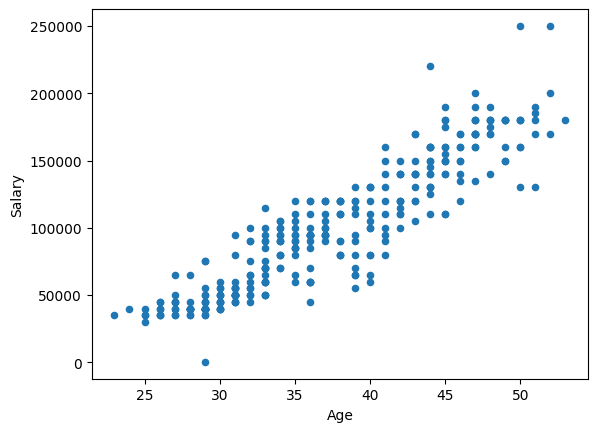

In [9]:
df.plot.scatter("Age", "Salary")

In [10]:
age_distribution = px.histogram(df, x="Age")
age_distribution.show()

<Axes: xlabel='Gender', ylabel='Salary'>

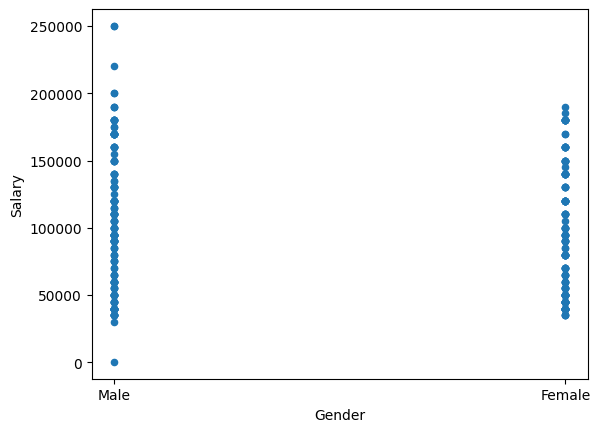

In [11]:
df.plot.scatter("Gender", "Salary")

In [12]:
gender_count = df['Gender'].value_counts().reset_index()
gender_distribution = px.pie(gender_count, values='count', names="Gender", title="Gender Proportion")
gender_distribution.show()

<Axes: xlabel='Education Level', ylabel='Salary'>

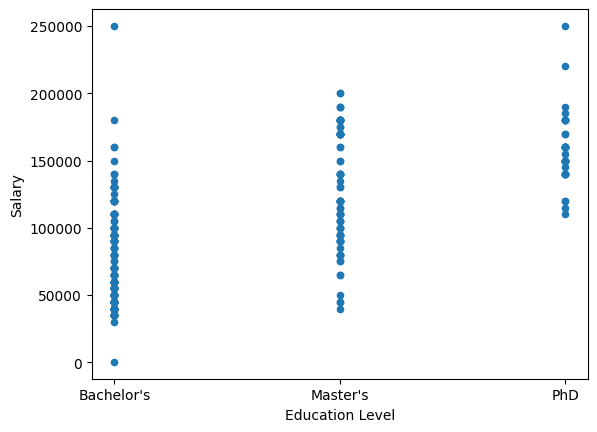

In [13]:
df.plot.scatter("Education Level", "Salary")

In [14]:
education_count = df['Education Level'].value_counts().reset_index()
education_distribution = px.pie(education_count, values='count', names="Education Level", title="Highest Level of Education by Degree")
education_distribution.show()

<Axes: xlabel='Job Title', ylabel='Salary'>

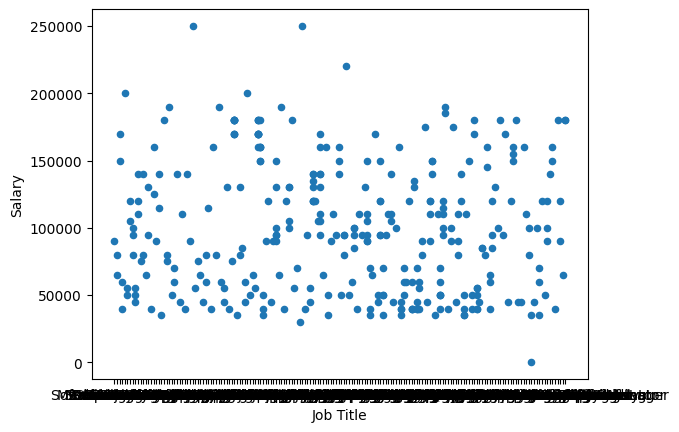

In [15]:
df.plot.scatter("Job Title", "Salary")

In [16]:
job_title_distribution = px.histogram(df, x="Job Title")
job_title_distribution.show()

<Axes: xlabel='Years of Experience', ylabel='Salary'>

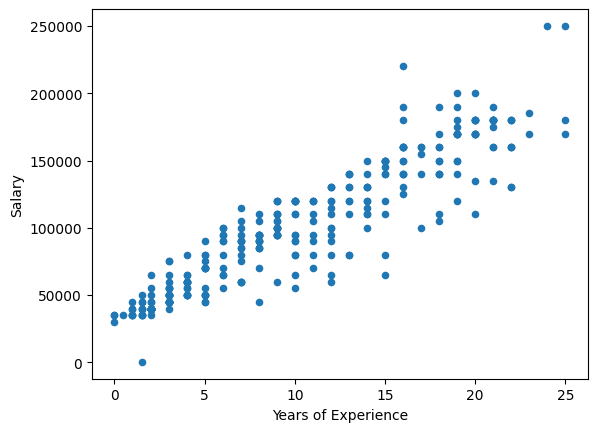

In [17]:
df.plot.scatter("Years of Experience", "Salary")

In [18]:
years_of_experience_distribution = px.histogram(df, x="Years of Experience")
years_of_experience_distribution.show()

In [19]:
salary_distribution = px.histogram(df, x="Salary")
salary_distribution.show()

# Label Encode the Dataset

Label encode all categorical data columns

In [20]:
df_copy = df.copy()

le = LabelEncoder()

# Encode labels in column 'Gender'.
df_copy['Gender'] = le.fit_transform(df_copy['Gender'])
df_copy['Gender'].unique()

# Encode labels in column 'Gender'.
df_copy['Education Level'] = le.fit_transform(df_copy['Education Level'])
df_copy['Education Level'].unique()

# Encode labels in column 'Gender'.
df_copy['Job Title'] = le.fit_transform(df_copy['Job Title'])
df_copy['Job Title'].unique()

array([159,  17, 130, 101,  22,  81,  93, 104,  82, 150, 158,  40,  36,
        96,  13,  89,  83, 116,  18, 102,   3, 172,  44,  98,  37, 157,
       160,  57, 112,  92,   6,   1,  19,  84, 167,  39,  95,  16, 103,
       169,  88,  85,   2, 162,  10,   0,  29,  41,  12,   5,  34, 171,
        38, 170, 156,  30, 115,  47,  21,  43,  14,   4, 118, 173,  99,
       166,  11, 153,  42,   9, 165, 106,   8,  56,  35,  46, 144,  91,
       164, 134, 168, 100,  76,  97,  87,  94, 122,  80, 143,   7,  20,
        45, 131,  15, 120, 161, 163, 110,  62,  86,  90,  61, 141,  66,
       121, 105, 152,  79, 154, 146,  73,  64,  54, 142,  49, 148,  65,
        70, 109,  32,  71, 111, 139,  53, 129,  59, 138,  28,  77, 149,
        31,  52, 132, 125,  50, 108, 147,  60,  25,  63,  55, 136, 124,
       155,  69, 135, 128, 145,  33, 107,  23,  74, 126, 113,  27,  48,
        78, 133, 127, 117,  51,  75, 140,  68, 151,  72, 119, 123, 114,
        67,  26, 137,  58,  24])

In [21]:
# Display the first 5 rows of the label encoded dataframe
df_copy.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [22]:
# Display the last 5 rows of the label encoded dataframe
df_copy.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
348,28.0,0,0,68,1.0,35000.0
349,36.0,1,0,111,8.0,110000.0
350,44.0,0,2,115,16.0,160000.0
351,31.0,1,0,63,3.0,55000.0
371,43.0,1,1,30,19.0,170000.0


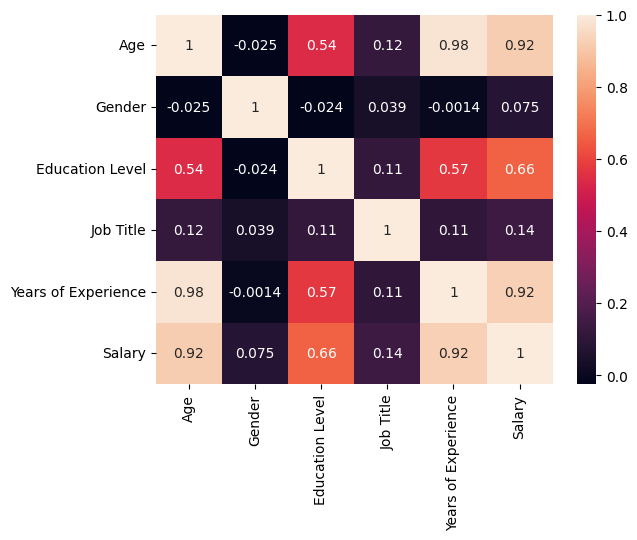

In [23]:
display_heat_map(df_copy)

# One Hot Encode the dataset

In [24]:
one_hot_encoded_df = one_hot_encode(df)

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Columns: 182 entries, Age to Job Title_Web Developer
dtypes: bool(179), float64(3)
memory usage: 66.8 KB


# Feature Selection

The heatmap shows that Age and Years of Experience are closely related, so Age will be dropped and only Years of Experience will be used.

The heatmap shows that gender and salary, and job title and salary are not closely related, so drop the gender and job title features.

In [25]:
max_feature_selection_df = df.drop(columns=["Age", "Gender", "Job Title"])
max_feature_selection_df = one_hot_encode(max_feature_selection_df)

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Years of Experience         324 non-null    float64
 1   Salary                      324 non-null    float64
 2   Education Level_Bachelor's  324 non-null    bool   
 3   Education Level_Master's    324 non-null    bool   
 4   Education Level_PhD         324 non-null    bool   
dtypes: bool(3), float64(2)
memory usage: 8.5 KB


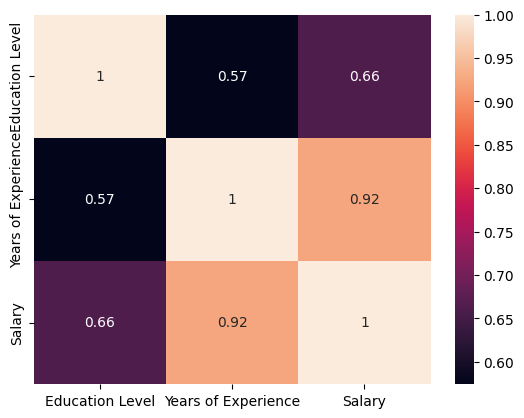

In [26]:
df_copy_max_feature_selection_df = df_copy.drop(columns=["Age", "Gender", "Job Title"])
display_heat_map(df_copy_max_feature_selection_df)

# Compare the performance of linear regression model with different preprocessing steps applied

In [27]:
print("Performance of model with one hot encoded preprocessing on original dataset")
train_model_and_evaluate(one_hot_encoded_df)

Performance of model with one hot encoded preprocessing on original dataset
Mean squared error: 29619146.45
Mean squared error percentage: 0.04
Root mean squared error: 5442.35
Mean absolute error: 3235.55
Coefficient of determination (R2 score): 0.99
Accuracy: 96.23


In [28]:
print("Performance of model with one hot encoded preprocessing on dataset with dropped age, gender and job title features")
train_model_and_evaluate(max_feature_selection_df)

Performance of model with one hot encoded preprocessing on dataset with dropped age, gender and job title features
Mean squared error: 334534434.91
Mean squared error percentage: 0.14
Root mean squared error: 18290.28
Mean absolute error: 12964.68
Coefficient of determination (R2 score): 0.85
Accuracy: 85.93
